# Cab Investment Analysis



In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
path = "C:/Users/JOAO/Documents/Data Glacier/DataGlacier/Week2/Cab Investment Case Study/"
os.chdir(path)
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')

dfs = {}
dfs['Cab_Data'] = cab_data
dfs['City'] = city
dfs['Customer'] = customer
dfs['Transaction'] = transaction

In [23]:
holidays = pd.read_csv('USHoliday.csv')
holidays['Date'] = pd.to_datetime(holidays['Date'])
holidays = holidays[holidays.Year.between(2016, 2018)][['Date', 'Holiday', 'WeekDay']]
dfs['Holiday'] = holidays
holidays.head()

,Date,Holiday,WeekDay
12,2016-07-04,4th of July,Monday
13,2017-07-04,4th of July,Tuesday
14,2018-07-04,4th of July,Wednesday
30,2016-12-25,Christmas Day,Sunday
31,2017-12-25,Christmas Day,Monday


In [3]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [4]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [5]:
customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [6]:
transaction

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [8]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [9]:
for key, df in dfs.items():
    print('*****{}*****\n{}\n'.format(key, df.dtypes))

*****Cab_Data*****
Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

*****City*****
City          object
Population    object
Users         object
dtype: object

*****Customer*****
Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

*****Transaction*****
Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object



In [10]:
def convert_date(row):
    start = dt.datetime(1899, 12, 31)
    ordinal = row['Date of Travel']
    if ordinal >= 60:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    return (start + dt.timedelta(days=ordinal)).replace(microsecond=0).date()

In [11]:
cab_data['Date of Travel'] = cab_data.apply(convert_date, axis = 1)

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit,Margin
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,137.253198,0.271284
std,1.268058e+05,12.233526,274.378911,157.993661,160.311840,0.185501
min,1.000001e+07,1.900000,15.600000,19.000000,-220.060000,-0.693015
25%,1.011081e+07,12.000000,206.437500,151.200000,28.012000,0.138559
50%,1.022104e+07,22.440000,386.360000,282.480000,81.962000,0.264303
75%,1.033094e+07,32.960000,583.660000,413.683200,190.030000,0.416120
max,1.044011e+07,48.000000,2048.030000,691.200000,1463.966000,0.762026


In [21]:
city.replace(',','', regex=True, inplace = True)
city['Population'] = city['Population'].astype(int)
city['Users'] = city['Users'].astype(int)
city.dtypes

City          object
Population     int32
Users          int32
dtype: object

In [22]:
city['Users/100k'] = city.Users / city.Population * 100000
city.sort_values(by = 'Users/100k', ascending = False)

,City,Population,Users,Users/100k
14,SAN FRANCISCO CA,629591,213609,33928.216890
19,BOSTON MA,248968,80021,32141.078372
17,WASHINGTON DC,418859,127001,30320.704581
2,LOS ANGELES CA,1595037,144132,9036.279409
1,CHICAGO IL,1955130,164468,8412.126048
6,SAN DIEGO CA,959307,69995,7296.412931
12,SEATTLE WA,671238,25063,3733.847011
0,NEW YORK NY,8405837,302149,3594.514145
9,ATLANTA GA,814885,24701,3031.225265
18,NASHVILLE TN,327225,9270,2832.913133


In [15]:
for key, df in dfs.items():
    print('\n*****{}***** --> {} rows'.format(key, df.shape[0]))
    print(df.isna().any())


*****Cab_Data***** --> 359392 rows
Transaction ID    False
Date of Travel    False
Company           False
City              False
KM Travelled      False
Price Charged     False
Cost of Trip      False
Profit            False
Margin            False
dtype: bool

*****City***** --> 20 rows
City          False
Population    False
Users         False
dtype: bool

*****Customer***** --> 49171 rows
Customer ID           False
Gender                False
Age                   False
Income (USD/Month)    False
dtype: bool

*****Transaction***** --> 440098 rows
Transaction ID    False
Customer ID       False
Payment_Mode      False
dtype: bool


In [24]:
data = cab_data.merge(transaction, how = 'left', on = 'Transaction ID')
data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Margin,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,0.154509,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.066010,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,0.220192,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,0.068357,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,0.146955,27182,Card
...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,0.084922,52392,Cash
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,0.060677,53286,Cash
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,0.200014,52265,Cash
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,0.219865,52175,Card


In [25]:
print(data.columns)
print(city.columns)
print(customer.columns)
print(holidays.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Profit', 'Margin', 'Customer ID',
       'Payment_Mode'],
      dtype='object')
Index(['City', 'Population', 'Users', 'Users/100k'], dtype='object')
Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')
Index(['Date', 'Holiday', 'WeekDay'], dtype='object')


In [26]:
data['Profit'] = data['Price Charged'] - data['Cost of Trip']
data['Margin'] =  data['Profit']/data['Price Charged']
data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit,Margin,Customer ID
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,137.253198,0.271284,19191.652115
std,1.268058e+05,12.233526,274.378911,157.993661,160.311840,0.185501,21012.412463
min,1.000001e+07,1.900000,15.600000,19.000000,-220.060000,-0.693015,1.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,28.012000,0.138559,2705.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,81.962000,0.264303,7459.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,190.030000,0.416120,36078.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,1463.966000,0.762026,60000.000000


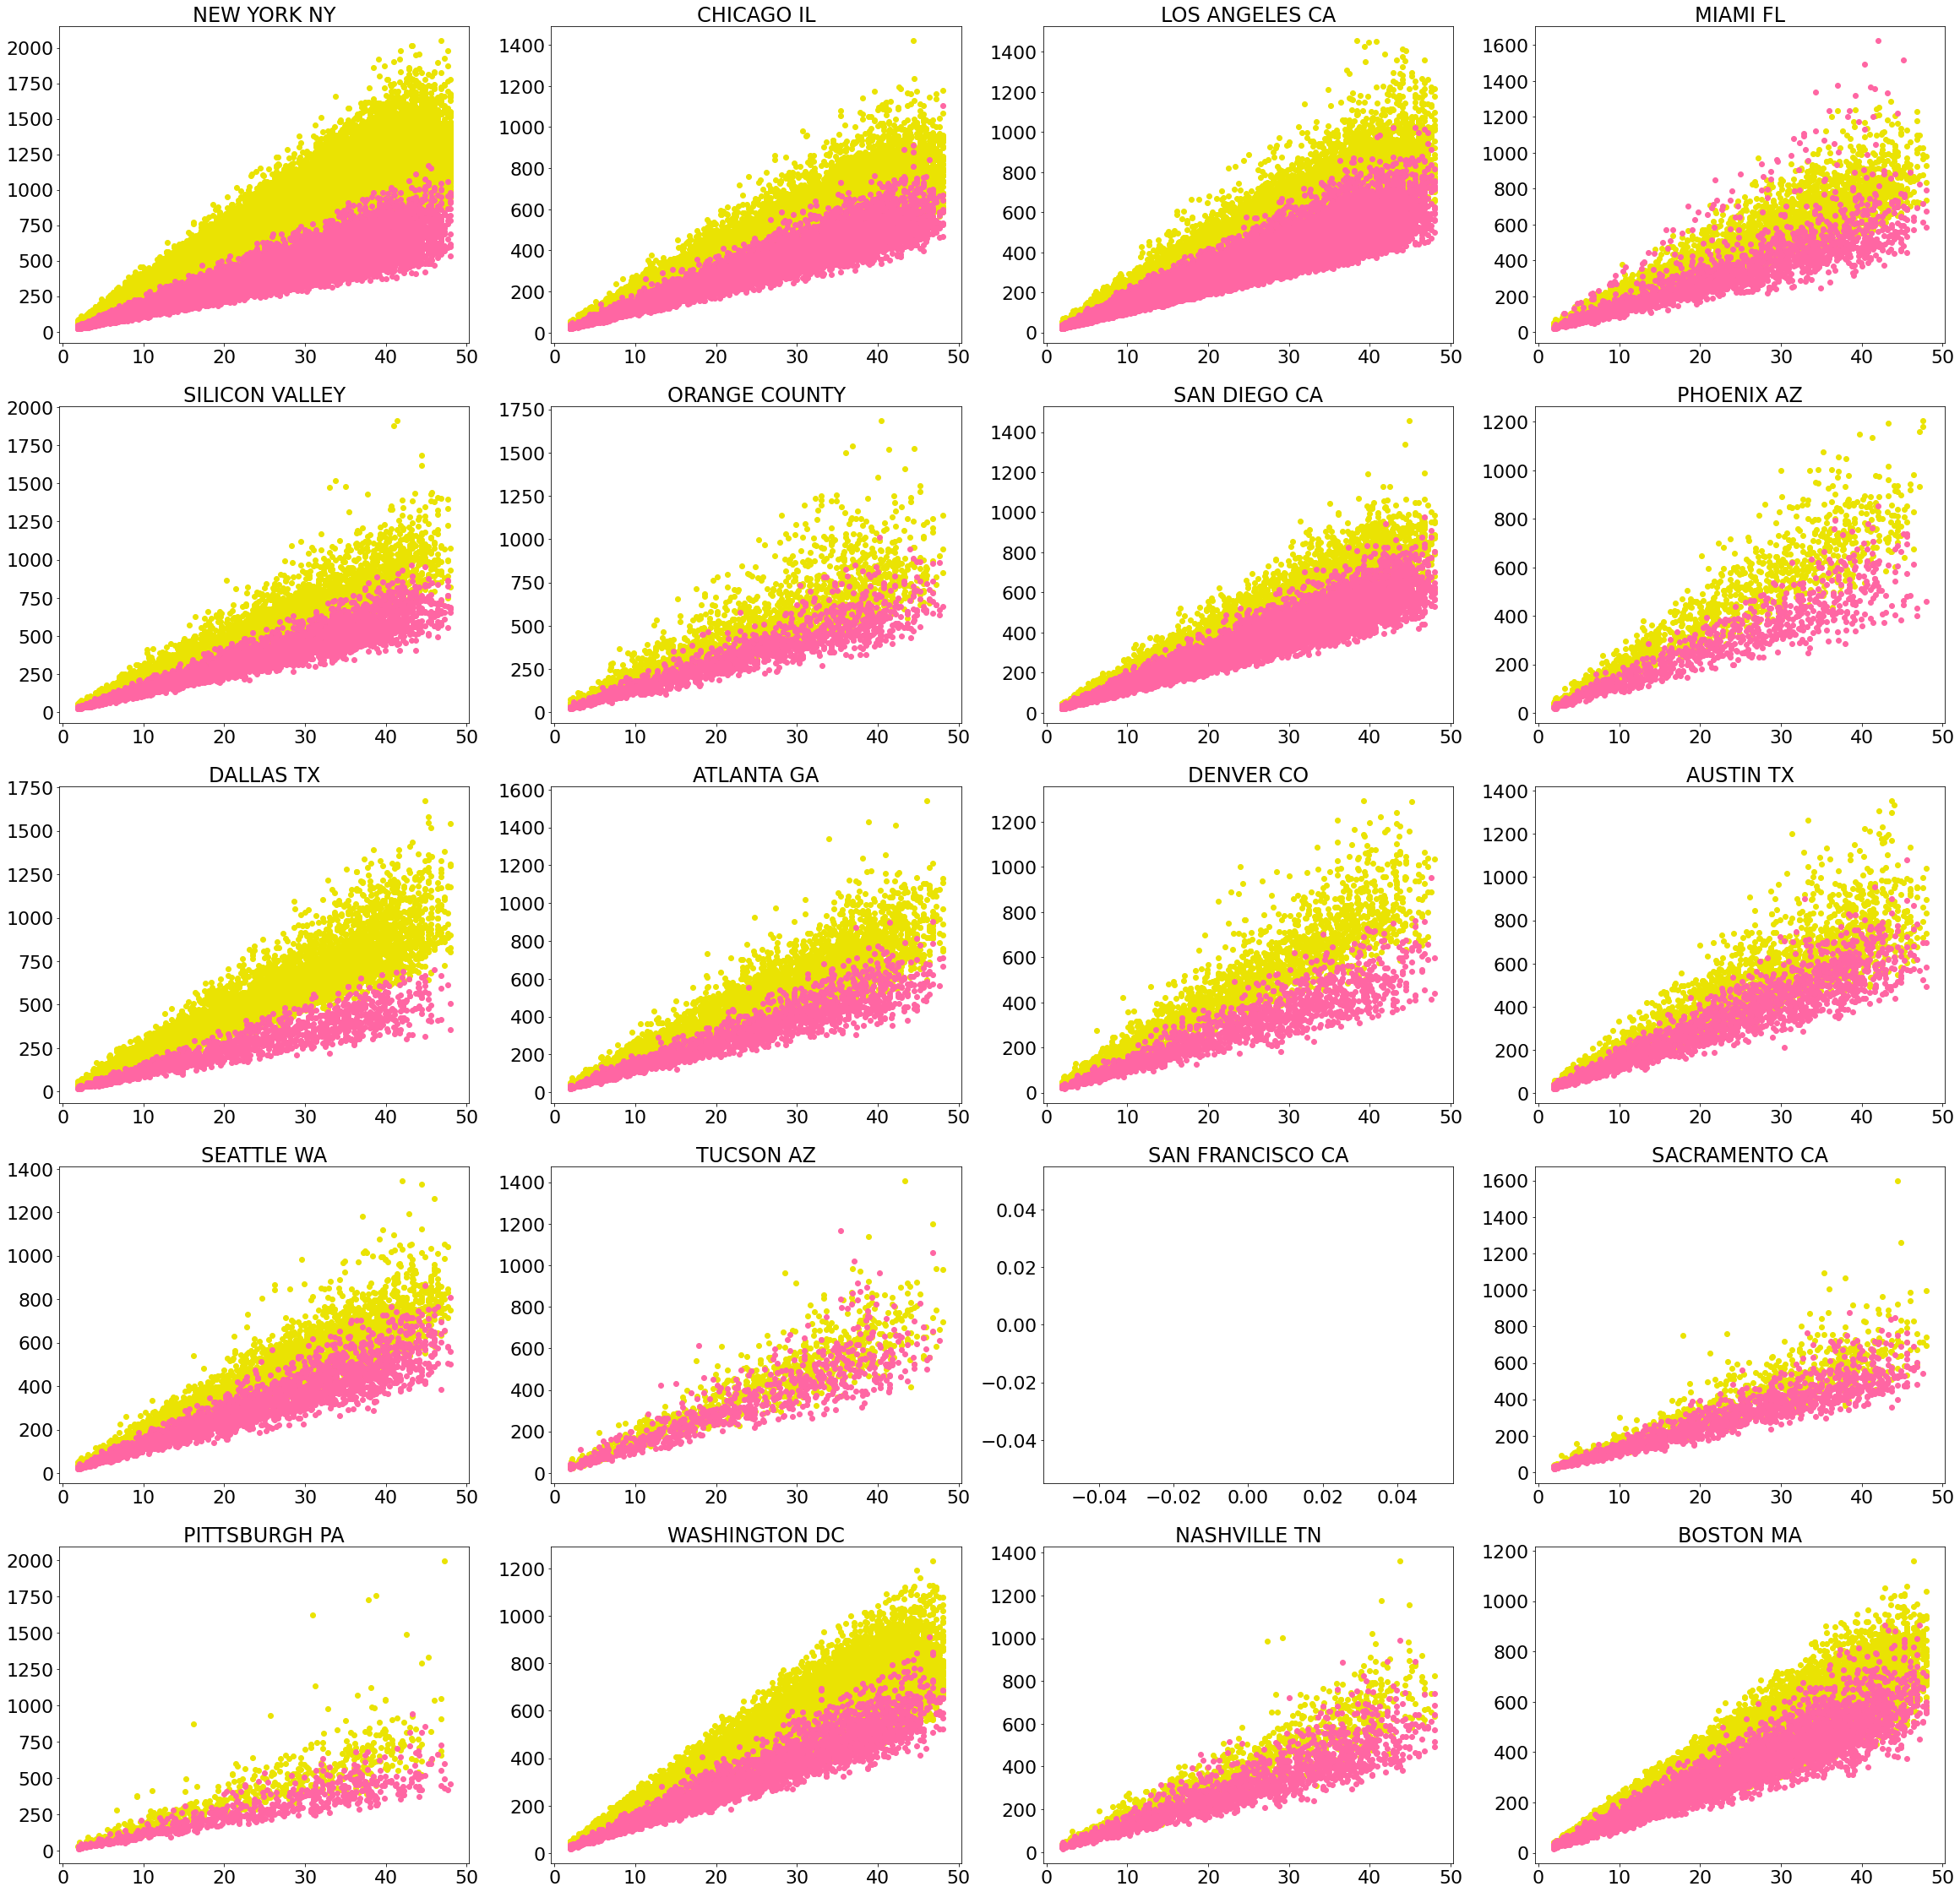

In [38]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(5, 4)
plt.rcParams["figure.figsize"] = (40,40)
plt.rcParams['font.size'] = 2

for i, el in enumerate(city.City.unique()):
    x = data[data.City == el]
    yellow = x[x.Company == 'Yellow Cab']
    pink = x[x.Company == 'Pink Cab']
    axis[i//4, i%4].scatter(yellow['KM Travelled'], yellow['Price Charged'], color = '#EAE303')
    axis[i//4, i%4].scatter(pink['KM Travelled'], pink['Price Charged'], color = '#ff66a3')
    axis[i//4, i%4].set_title(el, fontsize = 24)
# Combine all the operations and display
plt.show()

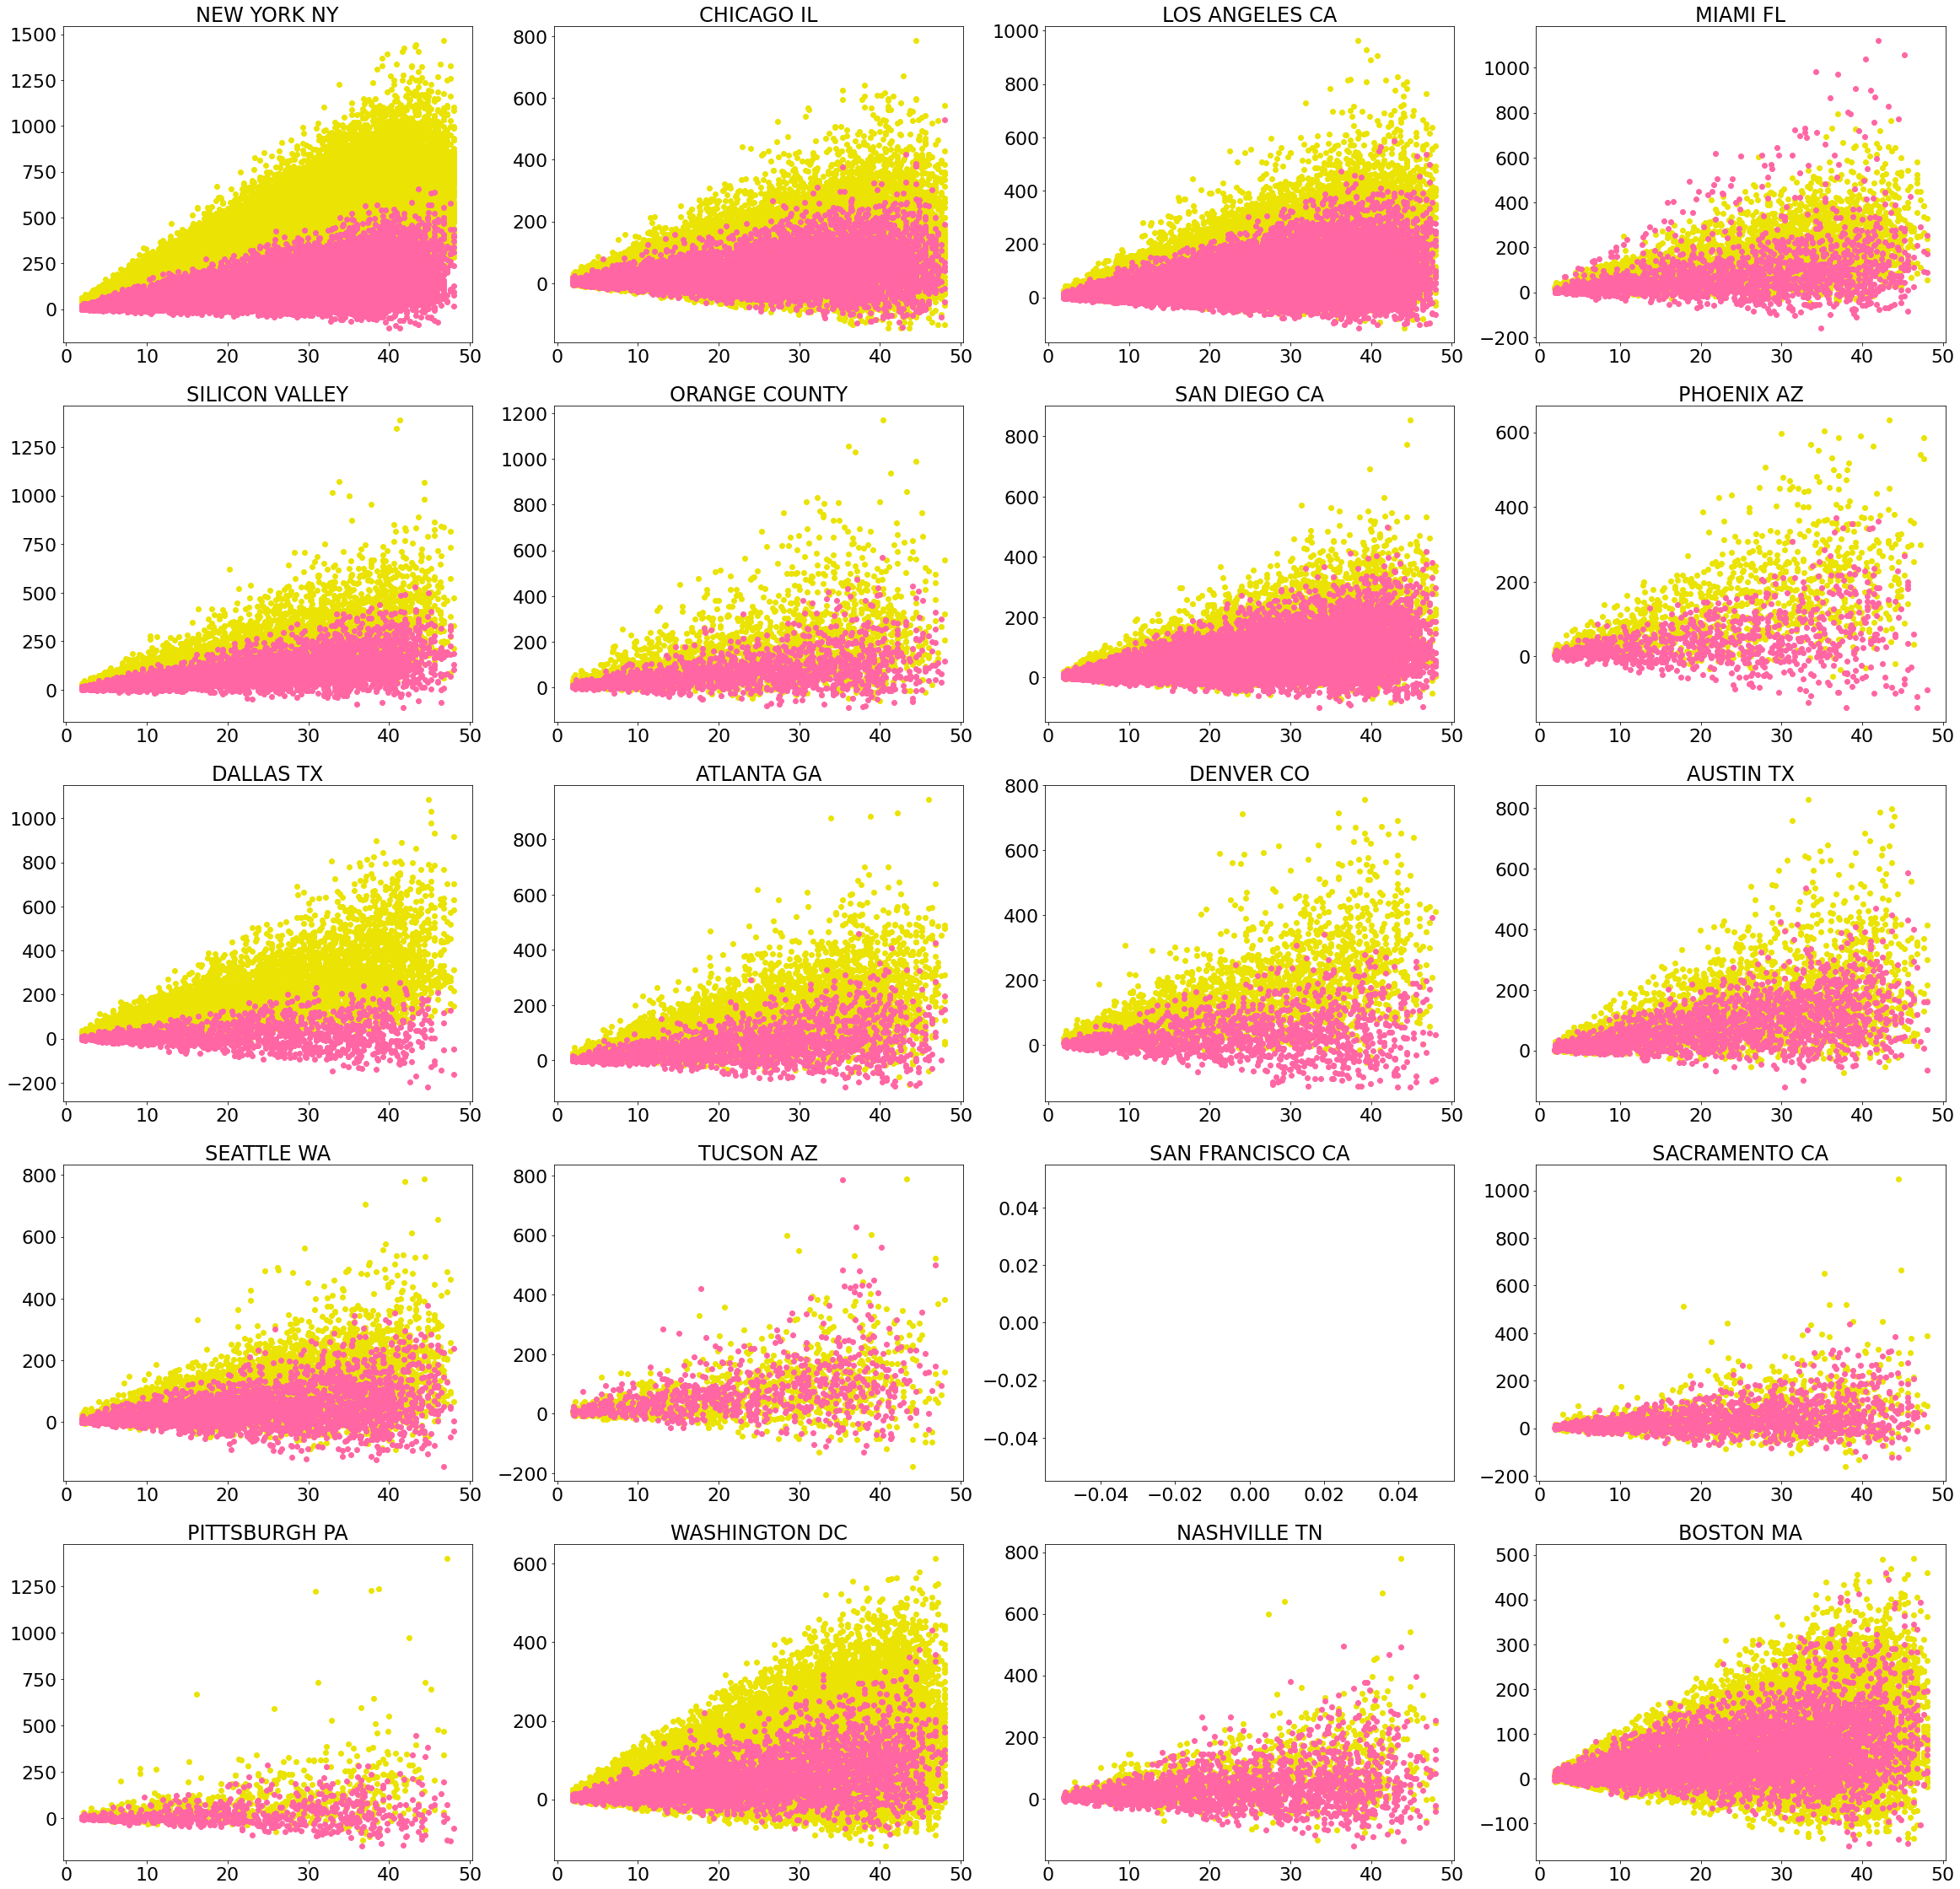

In [40]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(5, 4)
plt.rcParams["figure.figsize"] = (40,40)
plt.rcParams['font.size'] = 22

for i, el in enumerate(city.City.unique()):
    x = data[data.City == el]
    yellow = x[x.Company == 'Yellow Cab']
    pink = x[x.Company == 'Pink Cab']
    axis[i//4, i%4].scatter(yellow['KM Travelled'], yellow['Profit'], color = '#EAE303')
    axis[i//4, i%4].scatter(pink['KM Travelled'], pink['Profit'], color = '#ff66a3')
    axis[i//4, i%4].set_title(el, fontsize = 24)
# Combine all the operations and display
plt.show() 

In [201]:
total = 0
yellow = 0

for el in data.City.unique():
    sr = data[data.City == el].Profit
    std = sr.std()
    mean = sr.mean()
    outliers = sr.loc[(sr > mean + 3*std)]
    x = data.loc[outliers.index].Company.value_counts()
    total += outliers.size
    yellow += x.loc['Yellow Cab']
    #data.drop(outliers.index, inplace = True)
    print('{}: {} "outliers" - {:.1f}% Yellow Cab'.format(el, outliers.size, x.loc['Yellow Cab']/x.sum()*100))
    
print('\n{} of the {} "outliers" are from Yellow Cab company ==> {:.1f}%'.format(yellow, total, yellow/total*100))

ATLANTA GA: 119 "outliers" - 99.2% Yellow Cab
AUSTIN TX: 79 "outliers" - 94.9% Yellow Cab
BOSTON MA: 422 "outliers" - 87.0% Yellow Cab
CHICAGO IL: 926 "outliers" - 98.2% Yellow Cab
DALLAS TX: 98 "outliers" - 100.0% Yellow Cab
DENVER CO: 59 "outliers" - 100.0% Yellow Cab
LOS ANGELES CA: 762 "outliers" - 96.1% Yellow Cab
MIAMI FL: 108 "outliers" - 59.3% Yellow Cab
NASHVILLE TN: 43 "outliers" - 67.4% Yellow Cab
NEW YORK NY: 816 "outliers" - 100.0% Yellow Cab
ORANGE COUNTY: 81 "outliers" - 98.8% Yellow Cab
PHOENIX AZ: 35 "outliers" - 100.0% Yellow Cab
PITTSBURGH PA: 20 "outliers" - 95.0% Yellow Cab
SACRAMENTO CA: 44 "outliers" - 70.5% Yellow Cab
SAN DIEGO CA: 326 "outliers" - 88.7% Yellow Cab
SEATTLE WA: 116 "outliers" - 96.6% Yellow Cab
SILICON VALLEY: 133 "outliers" - 100.0% Yellow Cab
TUCSON AZ: 36 "outliers" - 47.2% Yellow Cab
WASHINGTON DC: 705 "outliers" - 99.1% Yellow Cab

4682 of the 4928 "outliers" are from Yellow Cab company ==> 95.0%


In [44]:
data['Gain'] = np.where(data['Profit'] >= 0, data['Profit'], None)
data['Loss'] = np.where(data['Profit'] < 0, data['Profit'], None)

In [50]:
g_profit = data.groupby(['Company']).agg({'Profit': 'count'})
g_profit

,Profit
Company,
Pink Cab,84711
Yellow Cab,274681


In [176]:
d_stats = {'Profit': ['count','sum', 'mean'], 
           'KM Travelled': ['sum', 'mean'], 
           'Gain':['count', 'sum', 'mean'], 
           'Loss':['count', 'sum', 'mean']}

col_names = ['Rides', 'Total Profit', 'Average Profit', 'Total Distance', 'Average Distance', 
             'Profitable Rides', 'Total Gain', 'Average Gain', 'Unprofitable Rides', 'Total Loss', 'Average Loss']
g_total = data.groupby(by = [pd.DatetimeIndex(data['Date of Travel']).year, 'Company']).agg(d_stats)
g_total.columns = col_names
g_total['Total Loss'] *= -1
g_total['Average Loss'] *= -1
g_total

Rides  Total Profit  Average Profit  \
Date of Travel Company                                           
2016           Pink Cab    25080  1.713511e+06       68.321819   
               Yellow Cab  82239  1.392700e+07      169.347821   
2017           Pink Cab    30321  2.033655e+06       67.070839   
               Yellow Cab  98189  1.657598e+07      168.817057   
2018           Pink Cab    29310  1.560162e+06       53.229689   
               Yellow Cab  94253  1.351740e+07      143.416122   

                           Total Distance  Average Distance  Profitable Rides  \
Date of Travel Company                                                          
2016           Pink Cab         563509.67         22.468488             21839   
               Yellow Cab      1859978.21         22.616742             78353   
2017           Pink Cab         685823.52         22.618763             25959   
               Yellow Cab      2214879.02         22.557303             93094   
2018           Pink Cab         661739.92         22.577275             25784   
               Yellow Cab      2124560.24         22.541036             89544   

                             Total Gain  Average Gain  Unprofitable Rides  \
Date of Travel Company                                                      
2016           Pink Cab    1.784712e+06     81.721315                3241   
               Yellow Cab  1.400503e+07    178.742780                3886   
2017           Pink Cab    2.128848e+06     82.008102                4362   
               Yellow Cab  1.668216e+07    179.196901                5095   
2018           Pink Cab    1.620440e+06     62.846743                3526   
               Yellow Cab  1.359228e+07    151.794451                4709   

                            Total Loss  Average Loss  
Date of Travel Company                                
2016           Pink Cab     71200.5820     21.968708  
               Yellow Cab   78037.6012     20.081730  
2017           Pink Cab     95193.4020     21.823338  
               Yellow Cab  106178.3404     20.839714  
2018           Pink Cab     60278.2250     17.095356  
               Yellow Cab   74882.5772     15.902013

In [129]:
def create_df(df, col):
    d = {}
    for year in df['Date of Travel'].unique():
        d[year] = [df[df['Date of Travel'] == year][df.Company == 'Yellow Cab'][col].iloc[0], 
                   df[df['Date of Travel'] == year][df.Company == 'Pink Cab'][col].iloc[0]]
    return pd.DataFrame.from_dict(d, orient='index', columns=['Yellow Cab', 'Pink Cab'])

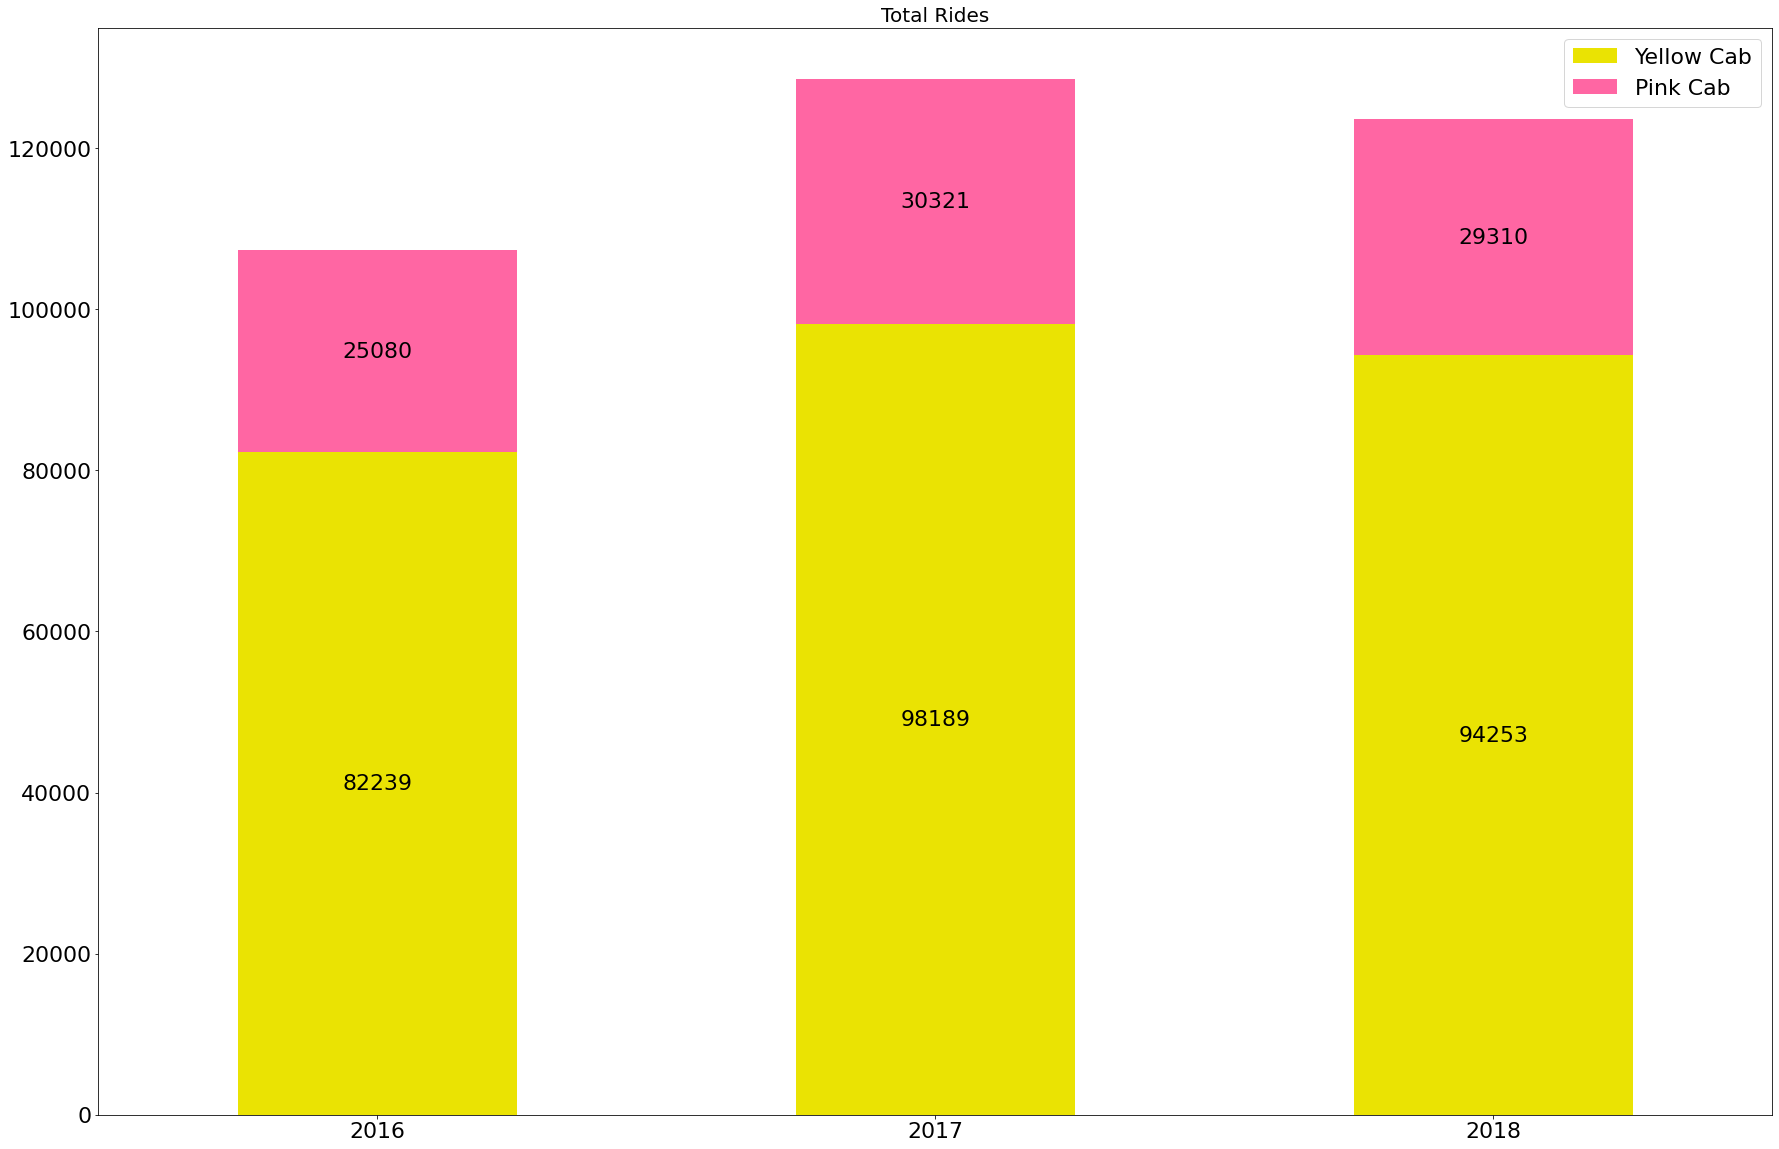

In [177]:
rides = create_df(g_total['Rides'].reset_index(), 'Rides')
ax = rides.plot.bar(stacked=True, color=['#EAE303', '#ff66a3'])
labels = [i for i in xx.to_numpy().flatten(order='F')]

for i, patch in enumerate(ax.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax.annotate(labels[i], (x, y), ha='center', va='center')

ax.set_title('Total Rides', fontsize=20)
plt.legend()
plt.xticks(rotation = 0)
plt.show()

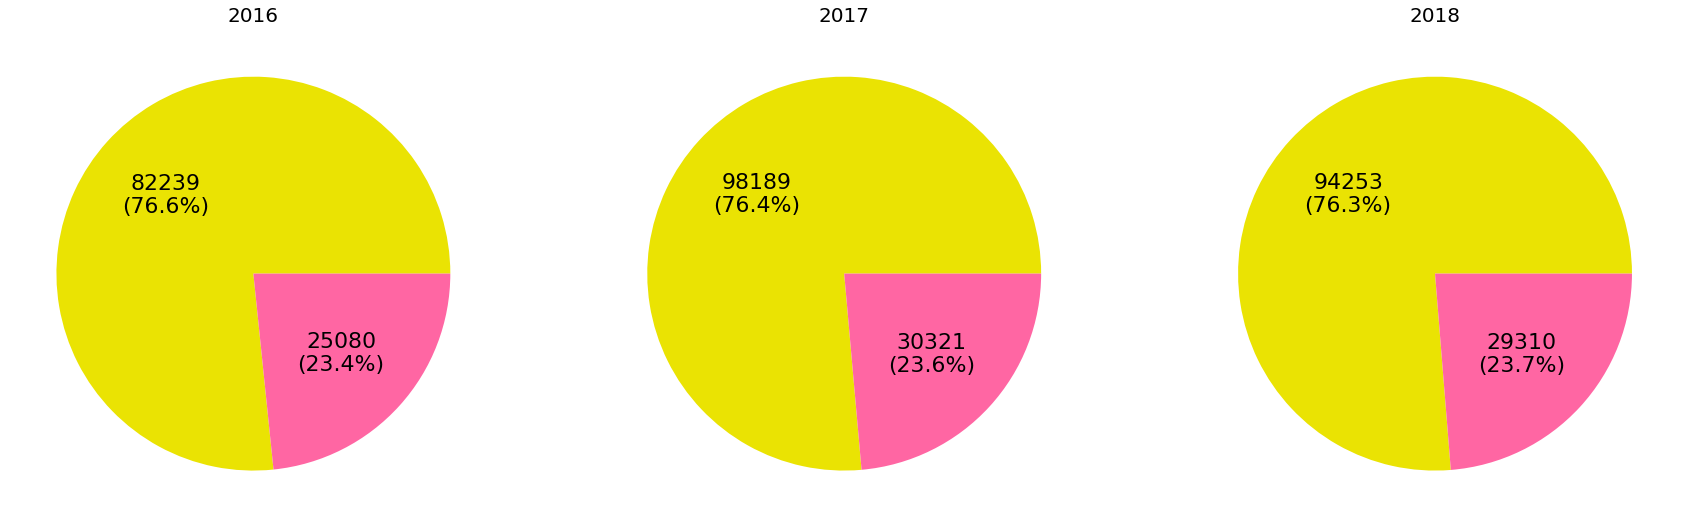

In [182]:
def my_fmt1(x):
    return '{:.0f}\n({:.1f}%)'.format(total*x/100, x)

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams['font.size'] = 22

for i, el in enumerate(rides.index):
    aux = rides.loc[el]
    total = aux.sum()
    #aux.plot.pie(autopct=my_fmt, colors=['#EAE303', '#ff66a3'], startangle=90)
    axis[i].pie(aux.values, labels = None, autopct=my_fmt1, colors=['#EAE303', '#ff66a3'])
    axis[i].set_title(el, fontsize = 20)
# Combine all the operations and display
plt.show()

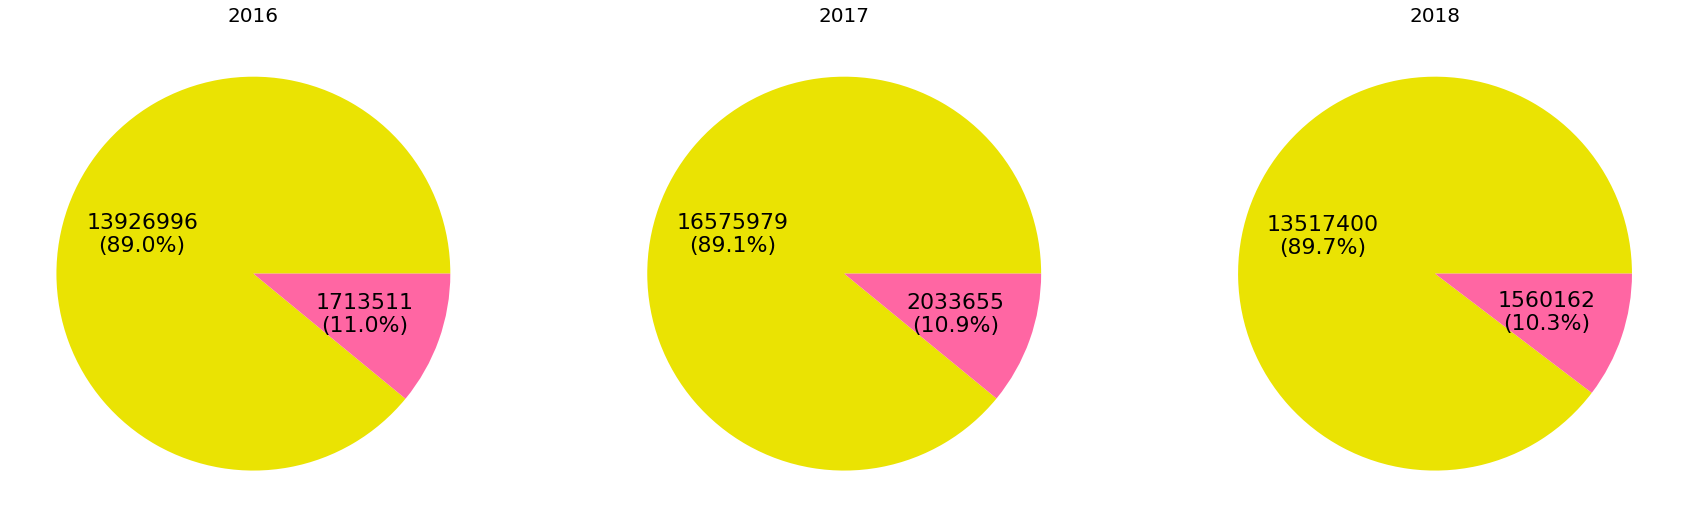

In [181]:
yearly_profit = create_df(g_total['Total Profit'].reset_index(), 'Total Profit')

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams['font.size'] = 22

for i, el in enumerate(yearly_profit.index):
    aux = yearly_profit.loc[el]
    total = aux.sum()
    #aux.plot.pie(autopct=my_fmt, colors=['#EAE303', '#ff66a3'], startangle=90)
    axis[i].pie(aux.values, labels = None, autopct=my_fmt, colors=['#EAE303', '#ff66a3'])
    axis[i].set_title(el, fontsize = 20)
# Combine all the operations and display
plt.show()

In [180]:
create_df(g_total['Total Profit'].reset_index(), 'Total Profit')

,Yellow Cab,Pink Cab
2016,1.392700e+07,1713511.224
2017,1.657598e+07,2033654.908
2018,1.351740e+07,1560162.189
